# Real_Estate Price Prediction

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df =  pd.read_csv("Real estate.csv")

### Exploratory Data Analysis

In [3]:
# Display the first 5 rows of datframe.
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Display 5 number summary of the data.
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Data Description:
##### No:
This appears to be a serial number or identifier for each entry in the dataset. It doesn't provide any meaningful information about the real estate itself.

##### X1 transaction date:
This column represents the transaction date. It appears to be in a format like "YYYY.MM". Each entry indicates the date of a real estate transaction.

##### X2 house age:
This column represents the age of the house in years. It indicates how many years the house has been since its construction.

##### X3 distance to the nearest MRT station:
This column represents the distance from the house to the nearest Mass Rapid Transit (MRT) station, which is a public transportation system. It's measured in units like meters.

##### X4 number of convenience stores:
This column represents the count of convenience stores near the house. It gives an idea of the availability of nearby amenities.

##### X5 latitude:
This column represents the latitude of the location of the house. Latitude is a geographical coordinate that specifies the north-south position of a point on the Earth's surface.

##### X6 longitude:
This column represents the longitude of the location of the house. Longitude is a geographical coordinate that specifies the east-west position of a point on the Earth's surface.

##### Y house price of unit area:
This is the target variable or the dependent variable we are trying to predict. It represents the house price per unit area, and it is the variable you would want to predict based on the other features in the dataset.

In [5]:
# Get info about all the cloumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


We can see that there is no missing value in the dataframe. We can also show it with heat map.

<Axes: >

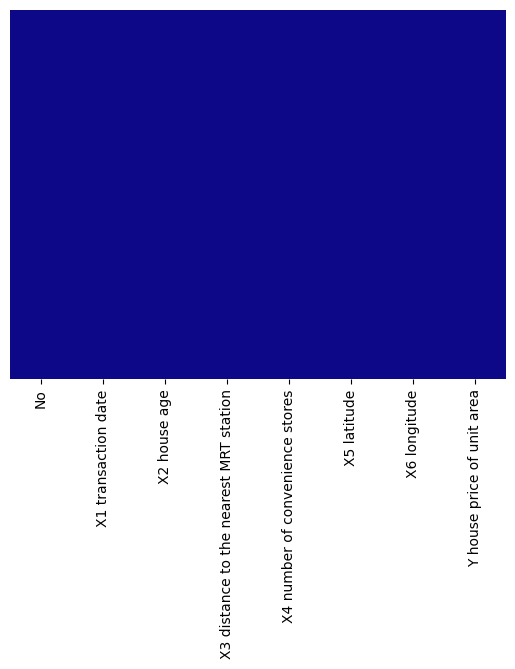

In [6]:
sns.heatmap(df.isnull(), cmap='plasma', cbar=False, yticklabels= False)

We can see that there is no missing data in the dataframe.

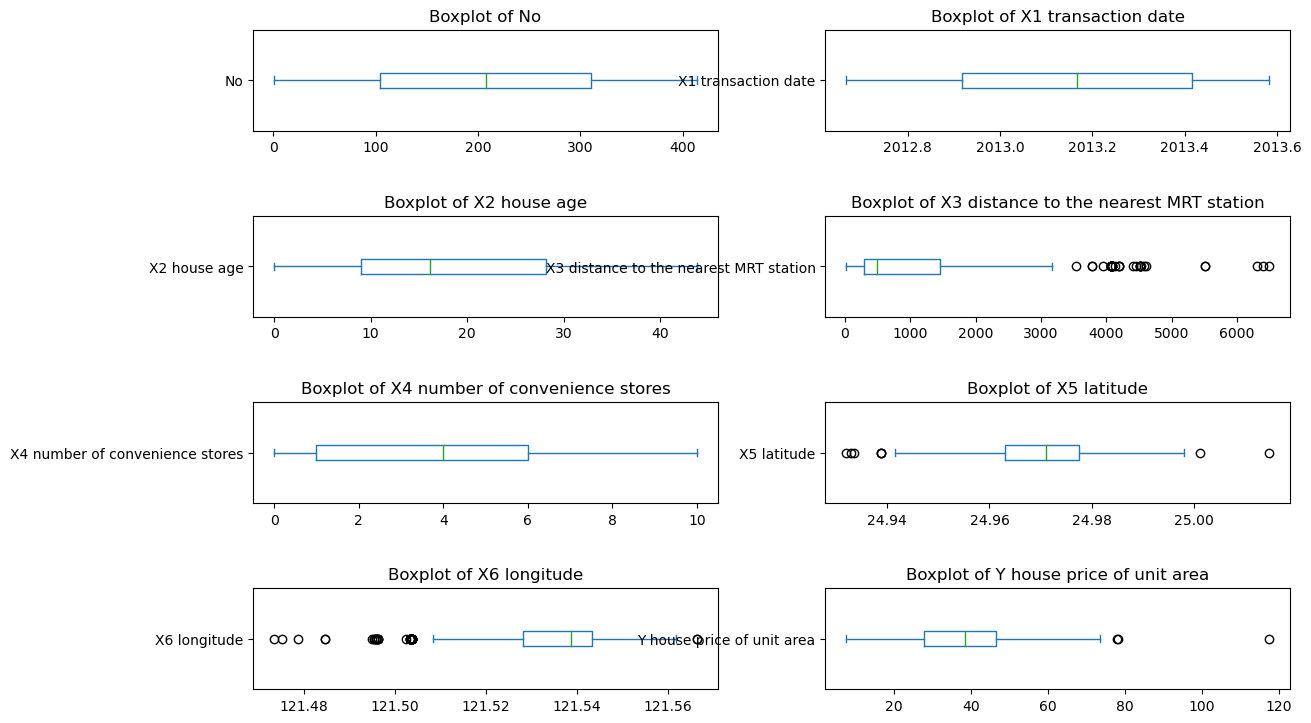

In [7]:
#Draw boxplots of numeric columns to detect the outliers.

# Get a list of numeric columns
numeric_columns = df.select_dtypes(include=[int, float]).columns.tolist()

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_columns)
num_rows = (num_cols + 1) // 2  # To arrange subplots in two rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))
fig.tight_layout(pad=4.0)

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes[i // 2, i % 2]
    df[column].plot(kind='box', vert=False, ax=ax)
    ax.set_title(f'Boxplot of {column}')

plt.show()

Box plots show that columns like "X3 distance to the nearest MRT station","X5 latitude", "X6 longitude", "Y house price of unit ares" have outliers.

As we know that column "No" adds no value to predict the price of house so it is better to drop it from the data.

In [8]:
df.drop('No', axis=1, inplace=True)

In [9]:
df.rename(columns={"X2 house age": "House age",
            "X3 distance to the nearest MRT station": "Distance to the nearest MRT station",
            "X4 number of convenience stores" : "No of convenience stores",
            "X5 latitude" : "Latitude",
            "X6 longitude" : "Longitude",
            "Y house price of unit area" : "House price of unit area"}, inplace = True)


We've decided to focus on the yearly perspective rather than considering months and dates. Consequently, we are extracting the 'year' information from the "X1 transaction date" column. Additionally, since the dataset lacks precise details for months and dates, retaining only the 'year' seems more appropriate for our analysis.

In [10]:
# Convert the 'X1 transaction date' column to datetime format.
df['X1 transaction date'] = pd.to_datetime(df['X1 transaction date'], format="%Y")

In [11]:
# Getting info about the data type of "X1 transaction date"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   X1 transaction date                  414 non-null    datetime64[ns]
 1   House age                            414 non-null    float64       
 2   Distance to the nearest MRT station  414 non-null    float64       
 3   No of convenience stores             414 non-null    int64         
 4   Latitude                             414 non-null    float64       
 5   Longitude                            414 non-null    float64       
 6   House price of unit area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


Perfect! Now our column "X1 transaction date" has datetime datatype, so we can extract year from it.

In [12]:
# Adding new column named "transaction year" to the dataframe.
df['Transaction year'] = df['X1 transaction date'].dt.year

In [13]:
#Drop column "X1 transaction date" which is providing no further information for analysis.
df = df.drop('X1 transaction date', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   House age                            414 non-null    float64
 1   Distance to the nearest MRT station  414 non-null    float64
 2   No of convenience stores             414 non-null    int64  
 3   Latitude                             414 non-null    float64
 4   Longitude                            414 non-null    float64
 5   House price of unit area             414 non-null    float64
 6   Transaction year                     414 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 21.2 KB


In [15]:
# Convert int32 data type to int64 for better analysis.
df['Transaction year'] = df['Transaction year'].astype('int64')

In [16]:
#Getting info about the data types of new dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   House age                            414 non-null    float64
 1   Distance to the nearest MRT station  414 non-null    float64
 2   No of convenience stores             414 non-null    int64  
 3   Latitude                             414 non-null    float64
 4   Longitude                            414 non-null    float64
 5   House price of unit area             414 non-null    float64
 6   Transaction year                     414 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


Now all data types are consistent so we may pass it to the model.

In [17]:
#Display first 5 rows of the data
df.head()

,House age,Distance to the nearest MRT station,No of convenience stores,Latitude,Longitude,House price of unit area,Transaction year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


###### Distribution of Houses Sold by Year:
You can visualize the distribution of houses sold each year. This helps in understanding the temporal pattern of real estate transactions.

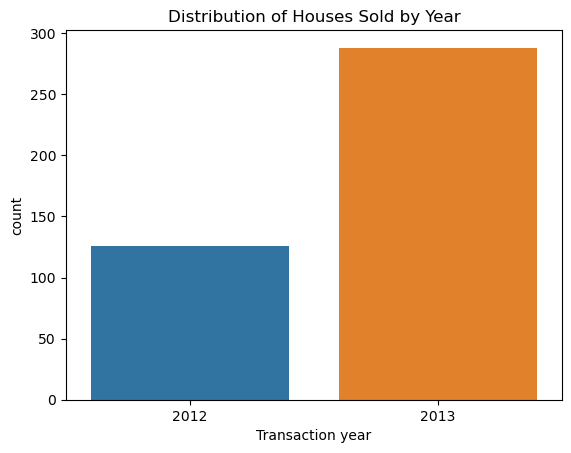

In [18]:
sns.countplot(x='Transaction year', data=df)
plt.title('Distribution of Houses Sold by Year')
plt.show()

The graph shows that the number of houses sold fluctuates over time. There is a peak in sales in 2013, while a decline in sales in 2012.

It is difficult to say for sure what is causing the fluctuations in the number of houses sold without more information. However, there are a number of factors that could be at play, such as:

Economic conditions: A strong economy may lead to more people buying houses, while a weak economy may lead to fewer people buying houses.

Interest rates: Lower interest rates can make it more affordable to buy a house, which can lead to an increase in sales.

Inventory: The availability of houses for sale can also affect the number of houses sold. If there are fewer houses on the market, it may be more difficult for buyers to find a house that meets their needs, which could lead to a decrease in sales.

Demographics: The demographics of the population can also affect the number of houses sold. For example, as the population ages, there may be fewer people who are looking to buy a house.

##### Average House Price by Year:
Explore the average house price per unit area for each year to observe trends in pricing.

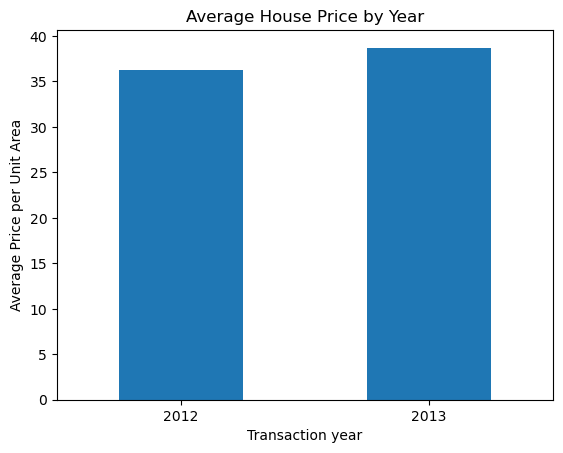

In [19]:
average_price_by_year = df.groupby('Transaction year')['House price of unit area'].mean()
average_price_by_year.plot(kind='bar', rot=0)
plt.title('Average House Price by Year')
plt.ylabel('Average Price per Unit Area')
plt.show()

The graph shows that the average house price per unit area has increased over the last year. There appears to be a general upward trend in prices, with some fluctuations from year to year.

#### Correlation Analysis:
Examine the correlation between features and the target variable. This helps identify which features have a stronger impact on house prices.

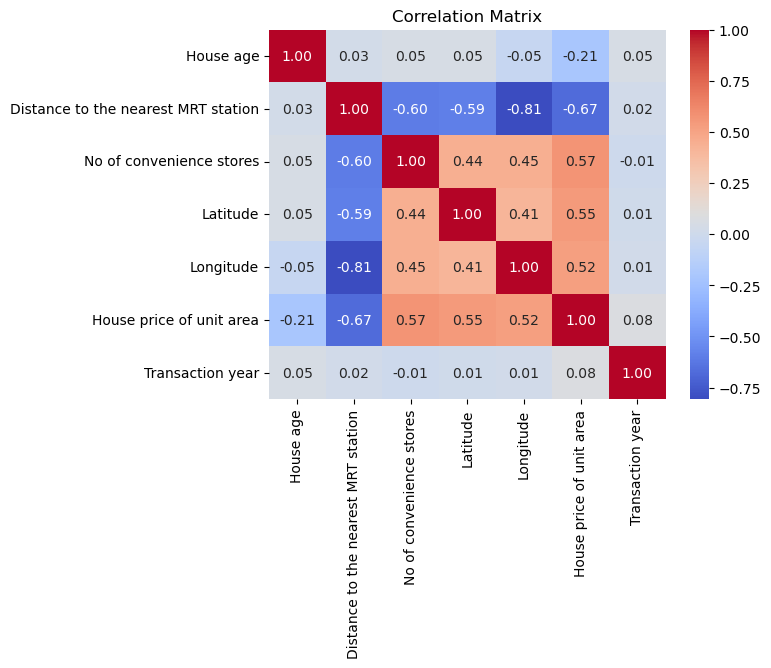

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation matrix measure the strength and direction of the linear relationship between two variables. The values in the matrix range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.Here are some insights that heatmap shows:
There is a strong negative correlation between house age and house price of unit area. This means that as houses get older, their price per unit area tends to decrease.

There is a moderate negative correlation between distance to the nearest MRT station and house price of unit area. This means that houses that are closer to MRT stations tend to be more expensive.

There is a weak positive correlation between the number of convenience stores and house price of unit area. This means that houses in areas with more convenience stores tend to be more expensive.

There is a weak positive correlation between latitude and house price of unit area. This means that houses located further north tend to be more expensive.

There is a weak positive correlation between longitude and house price of unit area. This means that houses located further east tend to be more expensive.


It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other. There may be other factors that explain the relationships observed in the heatmap.

## Split the dataset into training and testing set

We will spilt the Full dataset into Input and target variables

Input is also called Feature Variables Output referes to Target variables

In [21]:
# Separate the DataFrame 'df' into features (x) and target variable (y)
x= df.drop('House price of unit area', axis=1)
y= df['House price of unit area']

In [22]:
x.shape

(414, 6)

In [23]:
y.shape

(414,)

In [24]:
from sklearn import preprocessing
# Standardize the features using the StandardScaler from scikit-learn

# Create a StandardScaler object and fit it to the features (x)
pre_process = preprocessing.StandardScaler().fit(x)

# Transform the features using the fitted scaler to standardize the data
x_transform = pre_process.transform(x)

In [25]:
# Log-transform the target variable
y_transform = np.log1p(y)

In [26]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_transform, test_size = .20, random_state = 101)

In [27]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

In [28]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(83,)
[2.79206188 2.66886131 3.11410354 3.92337612 3.36073896 3.60172248
 3.55263936 3.70933239 3.87729673 3.69265121 3.80243533 3.49039853
 3.67235834 3.5456612  3.80887449 3.8710899  3.6438066  3.74587984
 3.91214948 3.81393212 3.70829209 4.03004829 3.89399652 3.61689415
 3.42929945 3.88893256 3.62567967 3.93199518 3.85941186 3.65294591
 3.86776484 3.65896558 3.77726476 3.76391866 3.8339581  2.65085707
 3.63585172 3.62862572 2.64940491 4.09057279 3.42234962 3.89433813
 3.20661306 3.81937369 3.72349974 3.98093502 3.70907444 3.57075555
 3.77051799 3.5875779  3.88016939 3.50689359 3.7237372  2.87615507
 3.63808461 3.91120308 3.78311003 3.76145367 3.79990355 3.68225474
 3.51993447 3.80892057 3.72591543 3.74915026 3.99575617 3.74180369
 3.22284424 3.85427513 3.37546685 3.63179249 3.73543338 3.93239422
 2.84206782 3.47952037 2.79389552 3.70931114 3.46187318 3.80655508
 3.76892215 2.76712819 3.83074544 3.61363155 3.7237372 ]


In [29]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          3.01 |          2.79
          2.50 |          2.67
          3.25 |          3.11
          3.85 |          3.92
          3.48 |          3.36
          3.47 |          3.60
          3.45 |          3.55
          3.77 |          3.71
          3.95 |          3.88
          3.69 |          3.69
          3.71 |          3.80
          3.18 |          3.49
          3.79 |          3.67
          3.45 |          3.55
          3.99 |          3.81
          3.87 |          3.87
          3.80 |          3.64
          3.81 |          3.75
          3.70 |          3.91
          3.89 |          3.81
          3.94 |          3.71
          4.17 |          4.03
          3.99 |          3.89
          4.12 |          3.62
          3.45 |          3.43
          3.89 |          3.89
          3.57 |          3.63
          3.89 |          3.93
          3.90 |          3.86
          3.79 |          3.65
     

##### Residual Analysis
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In a good model, the residuals should be randomly scattered around zero on a plot. If there are patterns or a fan-like shape, it suggests the model may not be the best fit. Outliers, points far from the others, can also affect the model.

Residual analysis helps ensure the model's accuracy and whether it meets the assumptions of linear regression. If issues are found, adjustments to the model may be needed to improve its performance.

In [30]:
residual = y_test- y_pred.reshape(-1)

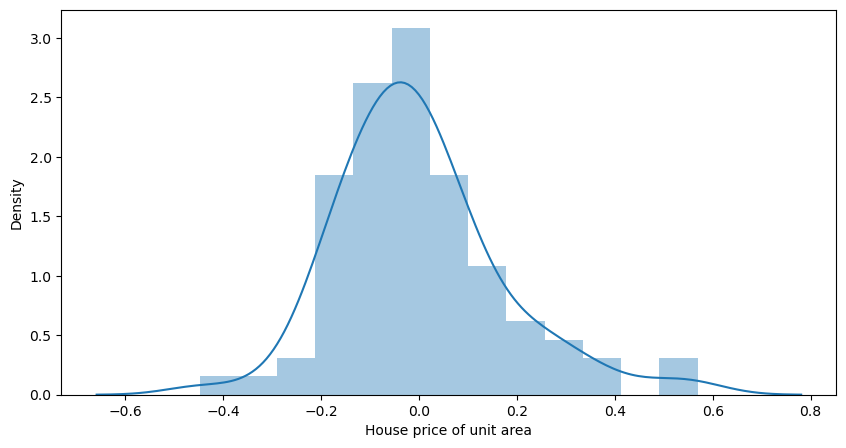

In [39]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

# Just for the sake of ignoring the warning
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = UserWarning)

It represents that our mode is not skewed as the distribution is center aligned. And data is also not skewed as much.

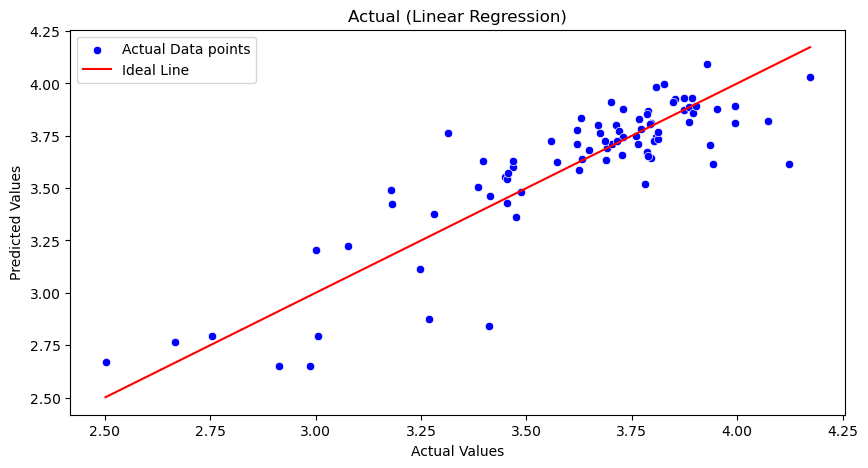

In [32]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()

In [33]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 0.028762918834719573
Root Mean Squared Error: 0.16959634086477093


## Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_DT = DT_regressor.predict(x_test)

mse_dt = mean_squared_error(y_pred_DT,y_test)
rmse_dt = np.sqrt(mse_dt)

print('Decision Tree Regression Model')
# Results
print('--'*30)

# Print evaluation metrics
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)


Decision Tree Regression Model
------------------------------------------------------------
Mean Squared Error: 0.055475454934328546
Root Mean Squared Error: 0.23553228002617507


## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor()
RF_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_RF = RF_regressor.predict(x_test)

mse_rf = mean_squared_error(y_pred_RF,y_test)
rmse_rf = np.sqrt(mse_rf)

print('Decision Tree Regression Model')
# Results
print('--'*30)

# Print evaluation metrics
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)

Decision Tree Regression Model
------------------------------------------------------------
Mean Squared Error: 0.02520312037255187
Root Mean Squared Error: 0.15875490660937655


## Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_gb = gb_regressor.predict(x_test)

mse_gb = mean_squared_error(y_pred_gb,y_test)
rmse_gb = np.sqrt(mse_gb)

print('Gradient Boosting Regression Model')
# Results
print('--'*30)

# Print evaluation metrics
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)

Gradient Boosting Regression Model
------------------------------------------------------------
Mean Squared Error: 0.020960572096196745
Root Mean Squared Error: 0.14477766435537198


In [37]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 0.028762918834719573,
    "Descison Tree": 0.0549770505995147,
    "Random Forest": 0.025673675030201466,
    "Gradient Boosting": 0.021320040723965053}

In [38]:
# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Gradient Boosting: 0.021320040723965053
2. Random Forest: 0.025673675030201466
3. Linear Regression: 0.028762918834719573
4. Descison Tree: 0.0549770505995147


Above all algorithms, Gradient Boosting Regressor performed well on the data.